In [254]:
import argparse
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as npz
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table

# Creating Bronze table

In [255]:
spark = pyspark.sql.SparkSession.builder \
        .appName("dev") \
        .master("local[*]") \
        .getOrCreate()
    
# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

In [256]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2024-12-01"

In [257]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01']

In [258]:
# create bronze datalake
bronze_feat_clickstream_directory = "datamart/bronze/clickstream/"
bronze_feat_attributes_directory = "datamart/bronze/feat_attributes/"
bronze_feat_financial_directory = "datamart/bronze/feat_financial/"

In [259]:
# bronze_feat_clickstream_directory = "datamart/bronze/clickstream/"

if not os.path.exists(bronze_feat_clickstream_directory):
    os.makedirs(bronze_feat_clicksteam_directory)

# run data processing
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_feat_clickstream(date_str, bronze_feat_clickstream_directory, spark)

print('\n\n---completed job for feat clickstream bronze table---\n\n')


2023-01-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_01_01.csv
2023-02-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_02_01.csv
2023-03-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_03_01.csv
2023-04-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_04_01.csv
2023-05-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_05_01.csv
2023-06-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_06_01.csv
2023-07-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_07_01.csv
2023-08-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_08_01.csv
2023-09-01 row count: 8974
Saved to: datamart/bronze/clickstream/bronze_feat_clickstream_2023_09_01.csv
2023-10-01 row count: 8974
Saved to: datamart/bronze/clickstream

In [260]:
# bronze_feat_attributes_directory = "datamart/bronze/feat_attributes/"

if not os.path.exists(bronze_feat_attributes_directory):
    os.makedirs(bronze_feat_attributes_directory)

for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table_feat_attri(date_str, bronze_feat_attributes_directory, spark)

print('\n\n---completed job for feat attribute bronze table---\n\n')

2023-01-01row count: 530
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_01_01.csv
2023-02-01row count: 501
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_02_01.csv
2023-03-01row count: 506
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_03_01.csv
2023-04-01row count: 510
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_04_01.csv
2023-05-01row count: 521
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_05_01.csv
2023-06-01row count: 517
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_06_01.csv
2023-07-01row count: 471
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_07_01.csv
2023-08-01row count: 481
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_08_01.csv
2023-09-01row count: 454
saved to: datamart/bronze/feat_attributes/bronze_feat_attribute_2023_09_01.csv
2023-10-01row count: 487
saved to: datamart/bronze/feat_attribut

In [261]:
bronze_feat_financial_directory = "datamart/bronze/feat_financial/"

if not os.path.exists(bronze_feat_financial_directory):
    os.makedirs(bronze_feat_financial_directory)

for date_str in dates_str_lst:
 utils.data_processing_bronze_table.process_bronze_table_feat_financial(date_str, bronze_feat_financial_directory, spark)

print('\n\n---completed job for feat financial bronze table---\n\n')

# spark.stop()

2023-01-01 row count: 530
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_01_01.csv
2023-02-01 row count: 501
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_02_01.csv
2023-03-01 row count: 506
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_03_01.csv
2023-04-01 row count: 510
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_04_01.csv
2023-05-01 row count: 521
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_05_01.csv
2023-06-01 row count: 517
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_06_01.csv
2023-07-01 row count: 471
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_07_01.csv
2023-08-01 row count: 481
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_08_01.csv
2023-09-01 row count: 454
Saved to: datamart/bronze/feat_financial/bronze_feat_financial_2023_09_01.csv
2023-10-01 row count: 487
Saved to: datamart/bronze/feat_financi

# Creating Silver table 

In [262]:
# Load Bronze Clickstream Table
bronze_clickstream_df = spark.read.csv("datamart/bronze/clickstream/", header=True, inferSchema=True)

# Load Bronze Feature Attributes Table
bronze_feat_attributes_df = spark.read.csv("datamart/bronze/feat_attributes/", header=True, inferSchema=True)

# Load Bronze Financial Features Table
bronze_feat_financial_df = spark.read.csv("datamart/bronze/feat_financial/", header=True, inferSchema=True)

# Convert to Pandas DataFrame if needed
bronze_clickstream_pd = bronze_clickstream_df.toPandas()
bronze_feat_attributes_pd = bronze_feat_attributes_df.toPandas()
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()


### Clickstream dataset

In [263]:
# view DataFrame
bronze_clickstream_df.printSchema()

print(bronze_clickstream_pd.head())  

root
 |-- fe_1: integer (nullable = true)
 |-- fe_2: integer (nullable = true)
 |-- fe_3: integer (nullable = true)
 |-- fe_4: integer (nullable = true)
 |-- fe_5: integer (nullable = true)
 |-- fe_6: integer (nullable = true)
 |-- fe_7: integer (nullable = true)
 |-- fe_8: integer (nullable = true)
 |-- fe_9: integer (nullable = true)
 |-- fe_10: integer (nullable = true)
 |-- fe_11: integer (nullable = true)
 |-- fe_12: integer (nullable = true)
 |-- fe_13: integer (nullable = true)
 |-- fe_14: integer (nullable = true)
 |-- fe_15: integer (nullable = true)
 |-- fe_16: integer (nullable = true)
 |-- fe_17: integer (nullable = true)
 |-- fe_18: integer (nullable = true)
 |-- fe_19: integer (nullable = true)
 |-- fe_20: integer (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

   fe_1  fe_2  fe_3  fe_4  fe_5  fe_6  fe_7  fe_8  fe_9  fe_10  ...  fe_13  \
0    71   243    89   149   202    56   149   207   232    111  ...    -17   
1

In [264]:
print("Clicksteream column describe: ")
print(bronze_clickstream_pd.describe())

print(" \n Attributes column describe: ")
print(bronze_feat_attributes_pd.describe())

print(" \n Finaical column describe: ")
print(bronze_feat_financial_pd.describe())

Clicksteream column describe: 
                fe_1           fe_2           fe_3           fe_4  \
count  215376.000000  215376.000000  215376.000000  215376.000000   
mean      101.414796     103.096195     104.333709     105.648503   
std        99.833594      99.930002     100.599865     100.326065   
min      -378.000000    -356.000000    -399.000000    -307.000000   
25%        34.000000      36.000000      36.000000      38.000000   
50%       102.000000     103.000000     104.000000     106.000000   
75%       169.000000     171.000000     172.000000     173.000000   
max       541.000000     560.000000     583.000000     562.000000   

                fe_5           fe_6           fe_7           fe_8  \
count  215376.000000  215376.000000  215376.000000  215376.000000   
mean      106.996676     103.235922     107.070337     110.718724   
std       100.693607     100.270388     100.323265     100.243698   
min      -343.000000    -321.000000    -368.000000    -361.000000   
25

In [265]:
print("Clicksteream column info: ")
print(bronze_clickstream_pd.info())


Clicksteream column info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215376 entries, 0 to 215375
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   fe_1           215376 non-null  int32 
 1   fe_2           215376 non-null  int32 
 2   fe_3           215376 non-null  int32 
 3   fe_4           215376 non-null  int32 
 4   fe_5           215376 non-null  int32 
 5   fe_6           215376 non-null  int32 
 6   fe_7           215376 non-null  int32 
 7   fe_8           215376 non-null  int32 
 8   fe_9           215376 non-null  int32 
 9   fe_10          215376 non-null  int32 
 10  fe_11          215376 non-null  int32 
 11  fe_12          215376 non-null  int32 
 12  fe_13          215376 non-null  int32 
 13  fe_14          215376 non-null  int32 
 14  fe_15          215376 non-null  int32 
 15  fe_16          215376 non-null  int32 
 16  fe_17          215376 non-null  int32 
 17  fe_18          215376

In [266]:
print("Clicksteream column check: ")
print(bronze_clickstream_pd.isna().sum())

Clicksteream column check: 
fe_1             0
fe_2             0
fe_3             0
fe_4             0
fe_5             0
fe_6             0
fe_7             0
fe_8             0
fe_9             0
fe_10            0
fe_11            0
fe_12            0
fe_13            0
fe_14            0
fe_15            0
fe_16            0
fe_17            0
fe_18            0
fe_19            0
fe_20            0
Customer_ID      0
snapshot_date    0
dtype: int64


#### Insights and Assumption
* all clickstream from the first time they sign up for loans until the next 20 months
* each feature represent each month
* clicks can be negative as it might be the coordinates
* Each user has clickstream

## Attributes Dataset

In [267]:
bronze_feat_attributes_df.printSchema()

print(bronze_feat_attributes_pd.head(5))

root
 |-- Customer_ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

  Customer_ID         Name  Age          SSN    Occupation snapshot_date
0  CUS_0x10ac        Zhouy   29  780-50-4730     Developer    2024-08-01
1  CUS_0x10c5        Moony   24  041-74-6785       _______    2024-08-01
2  CUS_0x1145  Blenkinsopr   24  426-31-9194       Teacher    2024-08-01
3  CUS_0x11ac    Liana B.v  26_  835-92-7751    Journalist    2024-08-01
4  CUS_0x122c   Papadimasf   48  883-73-9594  Entrepreneur    2024-08-01


In [268]:
print(" \n Attributes column info: ")
print(bronze_feat_attributes_pd.info())

 
 Attributes column info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    12500 non-null  object
 1   Name           12500 non-null  object
 2   Age            12500 non-null  object
 3   SSN            12500 non-null  object
 4   Occupation     12500 non-null  object
 5   snapshot_date  12500 non-null  object
dtypes: object(6)
memory usage: 586.1+ KB
None


In [269]:
print(" \n Attributes column check: ")
print(bronze_feat_attributes_pd.isna().sum())

 
 Attributes column check: 
Customer_ID      0
Name             0
Age              0
SSN              0
Occupation       0
snapshot_date    0
dtype: int64


In [270]:
bronze_feat_attributes_df.describe().show()

# Total rows
total_rows = bronze_feat_attributes_df.count()

# Unique customers
unique_customers = bronze_feat_attributes_df.select("Customer_ID").distinct().count()

print(f"Total rows: {total_rows}")
print(f"Unique customers: {unique_customers}")

# Check for duplicate customers
duplicate_customers = total_rows - unique_customers
print(f"Duplicate customers: {duplicate_customers}")

+-------+-----------+------+------------------+-----------+----------+
|summary|Customer_ID|  Name|               Age|        SSN|Occupation|
+-------+-----------+------+------------------+-----------+----------+
|  count|      12500| 12500|             12500|      12500|     12500|
|   mean|       NULL|  NULL|104.40925566888646|       NULL|      NULL|
| stddev|       NULL|  NULL| 659.4794049008866|       NULL|      NULL|
|    min| CUS_0x1000| Mattr|              -500|  #F%$D@*&8|Accountant|
|    max|  CUS_0xffd|    yv|               925|999-99-3421|   _______|
+-------+-----------+------+------------------+-----------+----------+

Total rows: 12500
Unique customers: 12500
Duplicate customers: 0


#### Insight
* mean and std seems to have outliers as there are age that goes below 0 and above 100
* SSN contians not SSN values
* SOme occupations consist of "______"

## Financial attribute

In [271]:
bronze_feat_financial_df.printSchema()

print(bronze_feat_financial_pd.head())

root
 |-- Customer_ID: string (nullable = true)
 |-- Annual_Income: string (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: string (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: string (nullable = true)
 |-- Changed_Credit_Limit: string (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: string (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: string (nullable = true)
 |-- Total_EMI_per_month: double (nullable = true)
 |-- Amount_invested_monthly: string (nullable = true)
 |-- Payment_Behaviour: string (nullable = true)
 |-- Mont

In [272]:
from pyspark.sql.functions import col, to_date

columns_to_cast = [
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Outstanding_Debt",
    "Monthly_Balance",
    "Annual_Income",
]

columns_to_float = ["Outstanding_Debt", 'Amount_invested_monthly', 'Changed_Credit_Limit']

for column in columns_to_cast:
    bronze_feat_financial_df = bronze_feat_financial_df.withColumn(column, col(column).cast("int"))

for column in columns_to_float:
    bronze_feat_financial_df = bronze_feat_financial_df.withColumn(column, col(column).cast("float"))

# Verify the changes
bronze_feat_financial_df.printSchema()

bronze_feat_financial_pd =bronze_feat_financial_df.toPandas()


bronze_feat_financial_pd.head(5)

root
 |-- Customer_ID: string (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Type_of_Loan: string (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: float (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- Credit_Mix: string (nullable = true)
 |-- Outstanding_Debt: float (nullable = true)
 |-- Credit_Utilization_Ratio: double (nullable = true)
 |-- Credit_History_Age: string (nullable = true)
 |-- Payment_of_Min_Amount: string (nullable = true)
 |-- Total_EMI_per_month: double (nullable = true)
 |-- Amount_invested_monthly: float (nullable = true)
 |-- Payment_Behaviour: string (nullable = true)
 |-- Mont

,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x10ac,16718.0,1270.220417,7,3,15,4.0,"Credit-Builder Loan, Credit-Builder Loan, Home...",26,11.0,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319.0,2024-08-01
1,CUS_0x10c5,158623.0,13180.596667,2,7,10,1.0,Payday Loan,10,5.0,...,Good,1134.0,41.796800,30 Years and 2 Months,No,91.033905,282.718689,High_spent_Medium_value_payments,1194.0,2024-08-01
2,CUS_0x1145,17975.0,1444.943333,6,5,32,9.0,"Student Loan, Payday Loan, Not Specified, Mort...",61,25.0,...,Bad,1263.0,25.681798,12 Years and 5 Months,Yes,76.450325,176.776215,Low_spent_Small_value_payments,181.0,2024-08-01
3,CUS_0x11ac,69136.0,5902.378333,3,4,14,0.0,None,14,18.0,...,Standard,478.0,32.103164,17 Years and 5 Months,Yes,0.000000,435.937012,Low_spent_Small_value_payments,444.0,2024-08-01
4,CUS_0x122c,36346.0,3188.844167,8,6,11,3.0,"Credit-Builder Loan, Home Equity Loan, and Aut...",21,15.0,...,Good,1252.0,28.066704,22 Years and 2 Months,NM,89.061554,110.509705,High_spent_Medium_value_payments,369.0,2024-08-01


In [273]:
print(" \n Financial column check: ")
print(bronze_feat_financial_pd.isna().sum())

 
 Financial column check: 
Customer_ID                    0
Annual_Income                859
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                  623
Type_of_Loan                1426
Delay_from_due_date            0
Num_of_Delayed_Payment       374
Changed_Credit_Limit         254
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt             139
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      558
Payment_Behaviour              0
Monthly_Balance                1
snapshot_date                  0
dtype: int64


#### insight 
* Type of loans has quite high of NA values, can be investigated
* credit history rate can be transformed as number instead of string (total months/year)
* Payment behaviour can be cleaned (some has gibberish category such as "!@9#%8") and can be one hot encoded

______________________________________________________________________________________________________________________________

## Data cleaning 

1. Possible data cleaning and analysis

#### a. Data type
* Change attributes for attribute table (age from object to int, snapshot date from object to date)

#### b. Data cleaning:
* Financial table
    * Type of loan: analyze what is inside and might want to consider to drop if there is no pattern between data that has type of loan and not
    * credit mix: we can consider on transforming "_" to null or impute mean if we want to try around
    * Payment behaviour: replace groups like !@9#%8 

* Attribute table
    * Occupation: transform "_____" into null instead or try to impute them
      
#### c. Data preprocessing:
* Attribute table
    * Age: can consider dropping or impute with mean
    * SSN: we can consider dropping it as we cannot "guess" or impute this value as it is made for identification

### a. Data type 

In [274]:
from pyspark.sql.functions import col, to_date

# Transform Age column to integer
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "Age",
    col("Age").cast("int")
)

# Transform snapshot_date column to date
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "snapshot_date",
    to_date(col("snapshot_date"), "yyyy-MM-dd")
)

# Check the changes 
bronze_feat_attributes_df.printSchema()
bronze_feat_attributes_df.show(5)

root
 |-- Customer_ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- SSN: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)

+-----------+-----------+----+-----------+------------+-------------+
|Customer_ID|       Name| Age|        SSN|  Occupation|snapshot_date|
+-----------+-----------+----+-----------+------------+-------------+
| CUS_0x10ac|      Zhouy|  29|780-50-4730|   Developer|   2024-08-01|
| CUS_0x10c5|      Moony|  24|041-74-6785|     _______|   2024-08-01|
| CUS_0x1145|Blenkinsopr|  24|426-31-9194|     Teacher|   2024-08-01|
| CUS_0x11ac|  Liana B.v|NULL|835-92-7751|  Journalist|   2024-08-01|
| CUS_0x122c| Papadimasf|  48|883-73-9594|Entrepreneur|   2024-08-01|
+-----------+-----------+----+-----------+------------+-------------+
only showing top 5 rows



### b. Data cleaning

* Financial table

    * Impute missing values (Annual_Income, Num_of_Loan, Type_of_Loan, Outstanding_Debt, Amount_invested_monthly)
    * Type of loan: analyze what is inside and might want to consider to drop if there is no pattern between data that has type of loan and not
    * credit mix: we can consider on transforming "_" to null or impute mean if we want to try around

* Attribute table
    * Clean occupation "______" and perform imputation


#### Financial table

In [275]:
# Check basic stats
bronze_feat_financial_df.select("Annual_Income", "Outstanding_Debt", "Amount_invested_monthly", "Num_of_Loan", "Num_of_Delayed_Payment",).describe().show()


+-------+------------------+------------------+-----------------------+-----------------+----------------------+
|summary|     Annual_Income|  Outstanding_Debt|Amount_invested_monthly|      Num_of_Loan|Num_of_Delayed_Payment|
+-------+------------------+------------------+-----------------------+-----------------+----------------------+
|  count|             11641|             12361|                  11942|            11877|                 12126|
|   mean|165301.64582080577| 1426.578108567268|     194.61439924251292|  2.8950071566894|     33.22076529770741|
| stddev|1318317.7486939076|1155.3610618500063|     200.62557960533147|65.49885397088404|     240.9501022068866|
|    min|              7005|               0.0|                    0.0|             -100|                    -3|
|    max|          23834698|            4998.0|               1977.326|             1495|                  4293|
+-------+------------------+------------------+-----------------------+-----------------+-------

1. Annual_Income: highly right skew
2. Outstanding_debt: moderate rigth
3. Amount_invested_monthly: slightly right skew
4. Num_of_Loan: extreme outliers (-100, 1495)
5. Num_of_Delayed_Payments: outliers with invalid payment method

In [276]:
from pyspark.sql.functions import when


# Replace negative values with null (so they can be imputed later)
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Num_of_Loan", when(col("Num_of_Loan") < 0, None).otherwise(col("Num_of_Loan"))
).withColumn(
    "Num_of_Delayed_Payment", when(col("Num_of_Delayed_Payment") < 0, None).otherwise(col("Num_of_Delayed_Payment"))
)


In [277]:
median_dict = {
    "Annual_Income": bronze_feat_financial_df.approxQuantile("Annual_Income", [0.5], 0.01)[0],
    "Outstanding_Debt": bronze_feat_financial_df.approxQuantile("Outstanding_Debt", [0.5], 0.01)[0],
    "Amount_invested_monthly": bronze_feat_financial_df.approxQuantile("Amount_invested_monthly", [0.5], 0.01)[0],
    "Num_of_Loan": bronze_feat_financial_df.approxQuantile("Num_of_Loan", [0.5], 0.01)[0],
    "Num_of_Delayed_Payment": bronze_feat_financial_df.approxQuantile("Num_of_Delayed_Payment", [0.5], 0.01)[0]
}


In [278]:
bronze_feat_financial_df = bronze_feat_financial_df.fillna(median_dict)
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()


In [279]:
from pyspark.sql.functions import mean, col

# Step 1: Calculate the mean of Monthly_Balance
monthly_balance_mean = bronze_feat_financial_df.select(mean(col("Monthly_Balance"))).collect()[0][0]

# Step 2: Fill the missing value with the mean
bronze_feat_financial_df = bronze_feat_financial_df.fillna({"Monthly_Balance": monthly_balance_mean})
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()

In [280]:
print(" \n Financial column check: ")
print(bronze_feat_financial_pd.isna().sum())

 
 Financial column check: 
Customer_ID                    0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                1426
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit         254
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
snapshot_date                  0
dtype: int64


##### Type of Loan

In [281]:
# Check the distinct values in the Type_of_Loan column
bronze_feat_financial_df.select("Type_of_Loan").distinct().show(truncate=False)

# Count the occurrences of each value in the Type_of_Loan column
bronze_feat_financial_df.groupBy("Type_of_Loan").count().orderBy("count", ascending=False).show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Type_of_Loan                                                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Personal Loan, Personal Loan, Credit-Builder Loan, Student Loan, and Auto Loan                                                                               |
|Credit-Builder Loan, Student Loan, Home Equity Loan, Debt Consolidation Loan, Not Specified, Not Specified, Home Equity Loan, Student Loan, and Personal Loan|
|Debt Consolidation Loan, Debt Consolidation Loan, Personal Loan, Payday Loan, and Not Specified                                                              |
|Credit-Builder Loan, Debt Consolidation

In [282]:
from pyspark.sql.functions import col, lit, when, regexp_replace, split, count, trim, explode

# Step 1: Fill nulls with "Not Specified"
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan",
    when(col("Type_of_Loan").isNull(), "Not Specified").otherwise(col("Type_of_Loan"))
)

# Step 2: Replace " and " with ", "
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r"\s+and\s+", ", ")
)

# Step 3: Remove multiple commas or trailing commas
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r",\s*,", ",")
)
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r",\s*$", "")
)

# Step 4: Split into array of loan types
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Type_of_Loan_Array", split(col("Type_of_Loan"), ",\s*")
)

bronze_feat_financial_df = bronze_feat_financial_df.drop("Type_of_Loan")


# Explode the array into individual rows for count purposes 
loan_type_counts = bronze_feat_financial_df.withColumn(
    "Individual_Loan_Type", explode(col("Type_of_Loan_Array"))
)
# Group by the individual loan type and count
loan_type_counts = loan_type_counts.groupBy("Individual_Loan_Type").count().orderBy("count", ascending=False)

# Show results
loan_type_counts.show(truncate=False)


bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()
bronze_feat_financial_pd.head(5)

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_23015/1102876603.py:24: SyntaxWarning: invalid escape sequence '\s'
  "Type_of_Loan_Array", split(col("Type_of_Loan"), ",\s*")


+-----------------------+-----+
|Individual_Loan_Type   |count|
+-----------------------+-----+
|Not Specified          |6378 |
|Payday Loan            |5071 |
|Credit-Builder Loan    |5055 |
|Home Equity Loan       |4888 |
|Student Loan           |4871 |
|Mortgage Loan          |4867 |
|Personal Loan          |4861 |
|Debt Consolidation Loan|4847 |
|Auto Loan              |4749 |
+-----------------------+-----+



,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date,Type_of_Loan_Array
0,CUS_0x10ac,16718,1270.220417,7,3,15,4,26,11,18.450001,...,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319,2024-08-01,"[Credit-Builder Loan, Credit-Builder Loan, Hom..."
1,CUS_0x10c5,158623,13180.596667,2,7,10,1,10,5,6.040000,...,1134.0,41.796800,30 Years and 2 Months,No,91.033905,282.718689,High_spent_Medium_value_payments,1194,2024-08-01,[Payday Loan]
2,CUS_0x1145,17975,1444.943333,6,5,32,9,61,25,8.900000,...,1263.0,25.681798,12 Years and 5 Months,Yes,76.450325,176.776215,Low_spent_Small_value_payments,181,2024-08-01,"[Student Loan, Payday Loan, Not Specified, Mor..."
3,CUS_0x11ac,69136,5902.378333,3,4,14,0,14,18,7.180000,...,478.0,32.103164,17 Years and 5 Months,Yes,0.000000,435.937012,Low_spent_Small_value_payments,444,2024-08-01,[Not Specified]
4,CUS_0x122c,36346,3188.844167,8,6,11,3,21,15,10.540000,...,1252.0,28.066704,22 Years and 2 Months,NM,89.061554,110.509705,High_spent_Medium_value_payments,369,2024-08-01,"[Credit-Builder Loan, Home Equity Loan, Auto L..."


##### Insight
We currently will keep the array to do one hot encoding later on gold table 

#### Credit mix

In [283]:
# Check the distinct values in the credit mix column
bronze_feat_financial_df.select("credit_mix").distinct().show(truncate=False)

# Count the occurrences of each value in the credit mix column
credit_mix_counts = bronze_feat_financial_df.groupBy("credit_mix").count().orderBy("count", ascending=False)
credit_mix_counts.show(truncate=False)

+----------+
|credit_mix|
+----------+
|_         |
|Good      |
|Bad       |
|Standard  |
+----------+

+----------+-----+
|credit_mix|count|
+----------+-----+
|Standard  |4497 |
|Good      |3032 |
|_         |2611 |
|Bad       |2360 |
+----------+-----+



##### Insight

Will not use mean to impute the credit mix as it might skew the whole distribution to majority bad with assumption. so we will create another column instead called Unknown instead of assuming that this belong to majority group. We will also one hot encode it

In [284]:
from pyspark.sql.functions import when, col

# Replace "_" with "Unknown"
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "credit_mix",
    when(col("credit_mix") == "_", "Unknown").otherwise(col("credit_mix"))
)

credit_mix_counts = bronze_feat_financial_df.groupBy("credit_mix").count().orderBy("count", ascending=False)
credit_mix_counts.show(truncate=False)

+----------+-----+
|credit_mix|count|
+----------+-----+
|Standard  |4497 |
|Good      |3032 |
|Unknown   |2611 |
|Bad       |2360 |
+----------+-----+



In [285]:
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()
bronze_feat_financial_pd['credit_mix'].head(20)

0      Unknown
1         Good
2          Bad
3     Standard
4         Good
5     Standard
6          Bad
7     Standard
8      Unknown
9          Bad
10     Unknown
11        Good
12        Good
13        Good
14    Standard
15         Bad
16    Standard
17    Standard
18     Unknown
19    Standard
Name: credit_mix, dtype: object

##### Payment Behaviour 

In [286]:
# Check the distinct values in the credit mix column
bronze_feat_financial_df.select("Payment_Behaviour").distinct().show(truncate=False)

# Count the occurrences of each value in the credit mix column
payment_behaviour_counts = bronze_feat_financial_df.groupBy("Payment_Behaviour").count().orderBy("count", ascending=False)
payment_behaviour_counts.show()

+--------------------------------+
|Payment_Behaviour               |
+--------------------------------+
|Low_spent_Small_value_payments  |
|High_spent_Medium_value_payments|
|High_spent_Small_value_payments |
|Low_spent_Large_value_payments  |
|Low_spent_Medium_value_payments |
|High_spent_Large_value_payments |
|!@9#%8                          |
+--------------------------------+

+--------------------+-----+
|   Payment_Behaviour|count|
+--------------------+-----+
|Low_spent_Small_v...| 3202|
|High_spent_Medium...| 2242|
|Low_spent_Medium_...| 1686|
|High_spent_Large_...| 1683|
|High_spent_Small_...| 1389|
|Low_spent_Large_v...| 1300|
|              !@9#%8|  998|
+--------------------+-----+



In [287]:
# Replace invalid Payment_Behaviour values with "Unknown"
bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Payment_Behaviour",
    F.when(F.col("Payment_Behaviour").rlike(r"^[a-zA-Z_]+$"), F.col("Payment_Behaviour")).otherwise("Unknown")
)

payment_behaviour_counts = bronze_feat_financial_df.groupBy("Payment_Behaviour").count().orderBy("count", ascending=False)
payment_behaviour_counts.show()

+--------------------+-----+
|   Payment_Behaviour|count|
+--------------------+-----+
|Low_spent_Small_v...| 3202|
|High_spent_Medium...| 2242|
|Low_spent_Medium_...| 1686|
|High_spent_Large_...| 1683|
|High_spent_Small_...| 1389|
|Low_spent_Large_v...| 1300|
|             Unknown|  998|
+--------------------+-----+



In [288]:
bronze_feat_financial_pd = bronze_feat_financial_df.toPandas()
bronze_feat_financial_pd['Payment_Behaviour'].head(10)

0                             Unknown
1    High_spent_Medium_value_payments
2      Low_spent_Small_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
5      Low_spent_Small_value_payments
6      Low_spent_Large_value_payments
7                             Unknown
8      Low_spent_Small_value_payments
9    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

##### Credit History Age years attribute

In [289]:
from pyspark.sql.functions import when, regexp_extract

bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
    "Credit_History_Age_Years",
    (
        regexp_extract(col("Credit_History_Age"), r"(\d+)\s+Years", 1).cast("int") +  # Extract years
        (regexp_extract(col("Credit_History_Age"), r"(\d+)\s+Months", 1).cast("int") / 12)  # Extract months and convert to years
    )
)

bronze_feat_financial_df = bronze_feat_financial_df.drop("Credit_History_Age")

# Show the result to verify
bronze_feat_financial_df.show(5)

+-----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+--------------------+----------+----------------+------------------------+---------------------+-------------------+-----------------------+--------------------+---------------+-------------+--------------------+------------------------+
|Customer_ID|Annual_Income|Monthly_Inhand_Salary|Num_Bank_Accounts|Num_Credit_Card|Interest_Rate|Num_of_Loan|Delay_from_due_date|Num_of_Delayed_Payment|Changed_Credit_Limit|Num_Credit_Inquiries|credit_mix|Outstanding_Debt|Credit_Utilization_Ratio|Payment_of_Min_Amount|Total_EMI_per_month|Amount_invested_monthly|   Payment_Behaviour|Monthly_Balance|snapshot_date|  Type_of_Loan_Array|Credit_History_Age_Years|
+-----------+-------------+---------------------+-----------------+---------------+-------------+-----------+-------------------+----------------------+--------------------+-----

#### Attribute table

In [290]:
# Replace "_______" in the occupation column with None
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "occupation",
    F.when(F.col("occupation") == "_______", None).otherwise(F.col("occupation"))
)

# Verify the changes
bronze_feat_attributes_df.select("occupation").distinct().show()

# Count NULL values in the occupation column
null_count = bronze_feat_attributes_df.filter(col("occupation").isNull()).count()

print(f"Number of NULL values in the occupation column: {null_count}")


+-------------+
|   occupation|
+-------------+
|    Scientist|
|Media_Manager|
|     Musician|
|       Lawyer|
|      Teacher|
|    Developer|
|       Writer|
|    Architect|
|     Mechanic|
| Entrepreneur|
|   Journalist|
|       Doctor|
|     Engineer|
|   Accountant|
|      Manager|
|         NULL|
+-------------+

Number of NULL values in the occupation column: 880


In [291]:
from pyspark.sql.functions import lit, sqrt, pow

# Select mean values for numerical attributes grouped by occupation
numerical_columns = [
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Credit_Card",
    "Num_of_Loan",
    "Num_of_Delayed_Payment"
]

# Calculate mean values for each occupation
occupation_means = join_table_df.groupBy("occupation").agg(
    *[avg(col_name).alias(f"mean_{col_name}") for col_name in numerical_columns]
)

# Extract the row for NULL occupation
null_means = occupation_means.filter(col("occupation").isNull()).collect()[0]

# Calculate Euclidean distance between NULL and other occupations
distance_columns = [
    sqrt(sum(pow(col(f"mean_{col_name}") - lit(null_means[f"mean_{col_name}"]), 2) for col_name in numerical_columns)).alias("distance")
]

occupation_distances = occupation_means.withColumn("distance", *distance_columns).orderBy("distance")

# Show the closest occupation to NULL
occupation_distances.show()

+-------------+------------------+--------------------------+--------------------+------------------+---------------------------+------------------+
|   occupation|mean_Annual_Income|mean_Monthly_Inhand_Salary|mean_Num_Credit_Card|  mean_Num_of_Loan|mean_Num_of_Delayed_Payment|          distance|
+-------------+------------------+--------------------------+--------------------+------------------+---------------------------+------------------+
|         NULL|100831.47045454546|         4179.709228817327|   25.26590909090909| 7.336363636363636|                     29.425|               0.0|
|      Teacher| 91119.31074168798|         4070.485664715049|   19.25063938618926|11.264705882352942|          57.85294117647059| 9712.818120308288|
|    Architect|120782.75471698113|         4311.159588657185|  24.158490566037734| 5.270440251572327|         28.476729559748428| 19951.71745267177|
|      Manager|127201.77989130435|         4284.735483671244|   24.66576086956522| 5.779891304347826|     

In [292]:
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "occupation",
    F.when(F.col("occupation").isNull(), 'Teacher').otherwise(F.col("occupation"))
)

bronze_feat_attributes_pd = bronze_feat_attributes_df.toPandas()
bronze_feat_attributes_pd.head(5)

,Customer_ID,Name,Age,SSN,occupation,snapshot_date
0,CUS_0x10ac,Zhouy,29.0,780-50-4730,Developer,2024-08-01
1,CUS_0x10c5,Moony,24.0,041-74-6785,Teacher,2024-08-01
2,CUS_0x1145,Blenkinsopr,24.0,426-31-9194,Teacher,2024-08-01
3,CUS_0x11ac,Liana B.v,NaN,835-92-7751,Journalist,2024-08-01
4,CUS_0x122c,Papadimasf,48.0,883-73-9594,Entrepreneur,2024-08-01


#### Insight:
* We are using Euclidean distance approach to try to see what occupation does this NULL group can belong to (to perform imputation) considering some of the financial issue
* Result: It appears that "teacher" is the closest one to Teacher

### c. Data preprocessing

In [293]:
# Create age bins
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "age_bin",
    F.when(F.col("Age") < 18, "Under 18")
    .when((F.col("Age") >= 18) & (F.col("Age") < 30), "18-29")
    .when((F.col("Age") >= 30) & (F.col("Age") < 50), "30-49")
    .when((F.col("Age") >= 50) & (F.col("Age") < 65), "50-64")
    .when(F.col("Age") >= 65, "65+")
    .otherwise("Unknown")
)

# Count users in each age bin
bronze_feat_attributes_df.groupBy("age_bin").count().orderBy("count", ascending=False).show()

+--------+-----+
| age_bin|count|
+--------+-----+
|   30-49| 6032|
|   18-29| 3880|
|   50-64| 1019|
|Under 18|  730|
| Unknown|  637|
|     65+|  202|
+--------+-----+



In [294]:
from pyspark.sql.functions import regexp_replace

# Remove underscores from the age column
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "Age",
    regexp_replace(F.col("Age"), "_", "")
)

# Verify the changes
bronze_feat_attributes_df.select("Customer_ID", "Age").show()

+-----------+----+
|Customer_ID| Age|
+-----------+----+
| CUS_0x10ac|  29|
| CUS_0x10c5|  24|
| CUS_0x1145|  24|
| CUS_0x11ac|NULL|
| CUS_0x122c|  48|
| CUS_0x1274|5656|
| CUS_0x1288|NULL|
| CUS_0x12cc|  30|
| CUS_0x1338|  40|
| CUS_0x1370|  32|
| CUS_0x1378|  15|
| CUS_0x139b|  46|
| CUS_0x13a9|  46|
| CUS_0x13ce|  52|
| CUS_0x147a|  20|
| CUS_0x1510|  27|
| CUS_0x1572|  39|
| CUS_0x159b|  35|
| CUS_0x15f1|  33|
| CUS_0x1621|  41|
+-----------+----+
only showing top 20 rows



In [295]:
# Create age bins
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "age_bin",
    F.when(F.col("Age") < 18, "Under 18")
    .when((F.col("Age") >= 18) & (F.col("Age") < 30), "18-29")
    .when((F.col("Age") >= 30) & (F.col("Age") < 50), "30-49")
    .when((F.col("Age") >= 50) & (F.col("Age") < 65), "50-64")
    .when(F.col("Age") >= 65, "65+")
    .otherwise("Unknown")
)

# Count users in each age bin
bronze_feat_attributes_df.groupBy("age_bin").count().orderBy("count", ascending=False).show()

+--------+-----+
| age_bin|count|
+--------+-----+
|   30-49| 6032|
|   18-29| 3880|
|   50-64| 1019|
|Under 18|  730|
| Unknown|  637|
|     65+|  202|
+--------+-----+



In [296]:
outlier_age_df = bronze_feat_attributes_df.filter((F.col("Age") > 100) | (F.col("Age") < 0))
outlier_age_df.select(*bronze_feat_attributes_df.columns).show()

print("Age:", outlier_age_df.count())

+-----------+-------------------+----+-----------+-------------+-------------+--------+
|Customer_ID|               Name| Age|        SSN|   occupation|snapshot_date| age_bin|
+-----------+-------------------+----+-----------+-------------+-------------+--------+
| CUS_0x1274|             Whited|5656|298-61-0480|    Scientist|   2024-08-01|     65+|
| CUS_0x2834|             Dennyd|3640|533-04-5976|    Scientist|   2024-08-01|     65+|
| CUS_0x3499|      Leigh Thomasv|1388|816-30-7776|    Architect|   2024-08-01|     65+|
| CUS_0x4ee5|   Erik Kirschbaumw|-500|009-33-0735|       Lawyer|   2024-08-01|Under 18|
| CUS_0x54bd|      Nick Edwardsv|2672|389-25-0255|   Journalist|   2024-08-01|     65+|
| CUS_0x682e|             Moiral|8125|130-71-2530|      Teacher|   2024-08-01|     65+|
| CUS_0x8062|           Andreasm|-500|  #F%$D@*&8|       Lawyer|   2024-08-01|Under 18|
|  CUS_0x815|           Raymondh|3441|307-66-3257|    Developer|   2024-08-01|     65+|
| CUS_0x8985|               Huwz

In [297]:
# Count outliers by snapshot_date
outliers_by_date = bronze_feat_attributes_df.filter((F.col("age") < 0) | (F.col("age") > 110) | (F.col("age").isNull())) \
    .groupBy("snapshot_date") \
    .count() \
    .orderBy("snapshot_date")

# Show the results
outliers_by_date.show()

+-------------+-----+
|snapshot_date|count|
+-------------+-----+
|   2023-01-01|   38|
|   2023-02-01|   32|
|   2023-03-01|   44|
|   2023-04-01|   51|
|   2023-05-01|   38|
|   2023-06-01|   42|
|   2023-07-01|   22|
|   2023-08-01|   40|
|   2023-09-01|   40|
|   2023-10-01|   35|
|   2023-11-01|   43|
|   2023-12-01|   31|
|   2024-01-01|   31|
|   2024-02-01|   38|
|   2024-03-01|   39|
|   2024-04-01|   42|
|   2024-05-01|   36|
|   2024-06-01|   43|
|   2024-07-01|   43|
|   2024-08-01|   36|
+-------------+-----+
only showing top 20 rows



### Insight
* Age currently will be impute with mean and will be analyze its significants on the gold table. if there is significants, we will keep it, otherwise we will drop it

In [298]:
from pyspark.sql.functions import col, mean, when, round

# Calculate the mean of valid age values (age >= 0 and age <= 120)
mean_age = bronze_feat_attributes_df.filter((col("Age") >= 0) & (col("Age") <= 120)) \
    .select(mean(col("Age")).cast("int").alias("mean_age")) \
    .collect()[0]["mean_age"]

# Replace invalid age values (age < 0, age > 120, or NULL) with the mean age
bronze_feat_attributes_df = bronze_feat_attributes_df.withColumn(
    "Age",
    when((col("Age") < 0) | (col("Age") > 110) | (col("Age").isNull()), mean_age).otherwise(col("Age").cast("int"))
)


print("Age mean:", mean_age)
# Verify the changes

bronze_feat_attributes_pd = bronze_feat_attributes_df.toPandas()
bronze_feat_attributes_pd.head(20)


Age mean: 33


,Customer_ID,Name,Age,SSN,occupation,snapshot_date,age_bin
0,CUS_0x10ac,Zhouy,29,780-50-4730,Developer,2024-08-01,18-29
1,CUS_0x10c5,Moony,24,041-74-6785,Teacher,2024-08-01,18-29
2,CUS_0x1145,Blenkinsopr,24,426-31-9194,Teacher,2024-08-01,18-29
3,CUS_0x11ac,Liana B.v,33,835-92-7751,Journalist,2024-08-01,Unknown
4,CUS_0x122c,Papadimasf,48,883-73-9594,Entrepreneur,2024-08-01,30-49
5,CUS_0x1274,Whited,33,298-61-0480,Scientist,2024-08-01,65+
6,CUS_0x1288,Taylorq,33,609-85-2725,Doctor,2024-08-01,Unknown
7,CUS_0x12cc,Lauren Tarat,30,761-36-5969,Developer,2024-08-01,30-49
8,CUS_0x1338,Olivia Orang,40,250-62-9181,Teacher,2024-08-01,30-49
9,CUS_0x1370,Rothackerb,32,710-06-0138,Writer,2024-08-01,30-49


In [299]:
# Check for invalid SSN values (empty or not matching the "000-00-0000" structure)
invalid_ssn_df = bronze_feat_attributes_df.filter(
    (F.col("SSN").isNull()) | 
    (~F.col("SSN").rlike(r"^\d{3}-\d{2}-\d{4}$"))
)

# Show invalid SSN values
invalid_ssn_df.select("SSN").show()

# Drop the SSN column
bronze_feat_attributes_df = bronze_feat_attributes_df.drop("SSN", "age_bin", 'Name')

# Verify the column is dropped
bronze_feat_attributes_df.printSchema()

+---------+
|      SSN|
+---------+
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
|#F%$D@*&8|
+---------+
only showing top 20 rows

root
 |-- Customer_ID: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)



##### Clickstream attribute

In [300]:
# Select only the columns up to fe_6
columns_to_keep = ["Customer_ID", "snapshot_date"] + [f"fe_{i}" for i in range(1, 7)]
bronze_clickstream_df = bronze_clickstream_df.select(*columns_to_keep)

# Show the filtered DataFrame
bronze_clickstream_df.show()

+-----------+-------------+----+----+----+----+----+----+
|Customer_ID|snapshot_date|fe_1|fe_2|fe_3|fe_4|fe_5|fe_6|
+-----------+-------------+----+----+----+----+----+----+
| CUS_0x1037|   2024-03-01|  71| 243|  89| 149| 202|  56|
| CUS_0x1069|   2024-03-01| -60|  65|  30| -56|  25| 206|
| CUS_0x114a|   2024-03-01|  50|  76| 115| 114| -57| 136|
| CUS_0x1184|   2024-03-01|   1| 245|  72| 247| 212|  80|
| CUS_0x1297|   2024-03-01|   8| 138| 164| 147| 184| 145|
| CUS_0x12fb|   2024-03-01| 190| 129|  74| 106|   1| 350|
| CUS_0x1325|   2024-03-01| 179| 140| -76| 320|   8|  36|
| CUS_0x1341|   2024-03-01| -29|  57|  67| 173| 171| 256|
| CUS_0x1375|   2024-03-01| 140|  50| -62| 178|  74| 145|
| CUS_0x13a8|   2024-03-01|  60| 177| -39| 156|  71|   7|
| CUS_0x13ef|   2024-03-01| 170| 349|   7| -87| 169| 157|
| CUS_0x1440|   2024-03-01| 140| 249|   8| 231| 152| 277|
| CUS_0x1443|   2024-03-01| -11|  36| 189| -54| 206| 226|
| CUS_0x145a|   2024-03-01|  23| 123| 211|   7| 136| 108|
| CUS_0x1492| 

In [301]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

bronze_clickstream_pd = bronze_clickstream_df.toPandas()

# Features to scale
features = [f'fe_{i}' for i in range(1, 7)]

# Initialize scaler
scaler = StandardScaler()

# Scale the features in pandas DataFrame
bronze_clickstream_pd[features] = scaler.fit_transform(bronze_clickstream_pd[features])

bronze_clickstream_pd.head(5)


,Customer_ID,snapshot_date,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6
0,CUS_0x1037,2024-03-01,-0.304656,1.400021,-0.152423,0.432107,0.943491,-0.471087
1,CUS_0x1069,2024-03-01,-1.616842,-0.381230,-0.738906,-1.611235,-0.814320,1.024872
2,CUS_0x114a,2024-03-01,-0.515006,-0.271152,0.106027,0.083244,-1.628674,0.326758
3,CUS_0x1184,2024-03-01,-1.005824,1.420035,-0.321410,1.408924,1.042803,-0.231733
4,CUS_0x1297,2024-03-01,-0.935707,0.349283,0.593106,0.412172,0.764731,0.416516


In [302]:
# Convert back to PySpark DataFrame
bronze_clickstream_df = spark.createDataFrame(bronze_clickstream_pd)
bronze_clickstream_df.show()


+-----------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
|Customer_ID|snapshot_date|                fe_1|                fe_2|                fe_3|                fe_4|               fe_5|                fe_6|
+-----------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+
| CUS_0x1037|   2024-03-01|-0.30465562675263747|  1.4000212886641896| -0.1524231164971341| 0.43210702680289903| 0.9434913310219825|  -0.471086560273972|
| CUS_0x1069|   2024-03-01| -1.6168422261278357|-0.38122968304568844| -0.7389063755130771| -1.6112351134731748|-0.8143204783301918|  1.0248720366860318|
| CUS_0x114a|   2024-03-01| -0.5150061503166006|-0.27115237580519036|  0.1060271332387052| 0.08324373456064253|-1.6286739719283745|  0.3267580247713634|
| CUS_0x1184|   2024-03-01| -1.0058240386325144|  1.4200353445260983| -0.321409818

# Create gold table

In [303]:
# Combine datasets
gold_table_df = bronze_clickstream_df.join(
    bronze_feat_attributes_df, on="Customer_ID", how="inner"
).join(
    bronze_feat_financial_df, on="Customer_ID", how="inner"
)

# Show the resulting Gold Table
gold_table_pd = gold_table_df.toPandas()

print(gold_table_pd.head(5))

  Customer_ID  snapshot_date      fe_1      fe_2      fe_3      fe_4  \
0  CUS_0x1037     2024-03-01 -0.304656  1.400021 -0.152423  0.432107   
1  CUS_0x1069     2024-03-01 -1.616842 -0.381230 -0.738906 -1.611235   
2  CUS_0x114a     2024-03-01 -0.515006 -0.271152  0.106027  0.083244   
3  CUS_0x1184     2024-03-01 -1.005824  1.420035 -0.321410  1.408924   
4  CUS_0x1297     2024-03-01 -0.935707  0.349283  0.593106  0.412172   

       fe_5      fe_6  Age  occupation  ... Outstanding_Debt  \
0  0.943491 -0.471087   45  Accountant  ...            665.0   
1 -0.814320  1.024872   32  Accountant  ...            208.0   
2 -1.628674  0.326758   43   Developer  ...           1154.0   
3  1.042803 -0.231733   49      Lawyer  ...            707.0   
4  0.764731  0.416516   46     Manager  ...           3916.0   

   Credit_Utilization_Ratio  Payment_of_Min_Amount  Total_EMI_per_month  \
0                 40.697699                     No            33.797021   
1                 25.233144     

In [304]:
gold_table_df.printSchema()

root
 |-- Customer_ID: string (nullable = true)
 |-- snapshot_date: date (nullable = true)
 |-- fe_1: double (nullable = true)
 |-- fe_2: double (nullable = true)
 |-- fe_3: double (nullable = true)
 |-- fe_4: double (nullable = true)
 |-- fe_5: double (nullable = true)
 |-- fe_6: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- occupation: string (nullable = true)
 |-- snapshot_date: date (nullable = true)
 |-- Annual_Income: integer (nullable = true)
 |-- Monthly_Inhand_Salary: double (nullable = true)
 |-- Num_Bank_Accounts: integer (nullable = true)
 |-- Num_Credit_Card: integer (nullable = true)
 |-- Interest_Rate: integer (nullable = true)
 |-- Num_of_Loan: integer (nullable = true)
 |-- Delay_from_due_date: integer (nullable = true)
 |-- Num_of_Delayed_Payment: integer (nullable = true)
 |-- Changed_Credit_Limit: float (nullable = true)
 |-- Num_Credit_Inquiries: double (nullable = true)
 |-- credit_mix: string (nullable = true)
 |-- Outstanding_Debt: float (nul

In [305]:
from pyspark.sql.types import NumericType

# Get a list of numeric columns
numeric_columns = [field.name for field in gold_table_df.schema.fields if isinstance(field.dataType, NumericType)]

# Select only the numeric columns
df_numeric = gold_table_df.select(*numeric_columns)

# Show the result
pd_numeric = df_numeric.toPandas()

pd_numeric.head()


,fe_1,fe_2,fe_3,fe_4,fe_5,fe_6,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Years
0,-0.304656,1.400021,-0.152423,0.432107,0.943491,-0.471087,45,15989,1086.423750,5,...,13,15,0.50,3.0,665.0,40.697699,33.797021,80.465240,284,19.750000
1,-1.616842,-0.381230,-0.738906,-1.611235,-0.814320,1.024872,32,58637,4799.445000,4,...,9,17,12.56,5.0,208.0,25.233144,139.885013,165.210617,434,30.666667
2,-0.515006,-0.271152,0.106027,0.083244,-1.628674,0.326758,43,15305,1230.455000,0,...,14,2,15.95,0.0,1154.0,27.525113,20.301654,64.778481,327,15.750000
3,-1.005824,1.420035,-0.321410,1.408924,1.042803,-0.231733,49,19867,1396.622917,3,...,10,9,6.74,4.0,707.0,26.689790,42.606882,23.460943,313,32.666667
4,-0.935707,0.349283,0.593106,0.412172,0.764731,0.416516,46,36871,4881.505000,9,...,61,24,14.27,11.0,3916.0,25.742143,296.284136,53.821178,388,13.666667


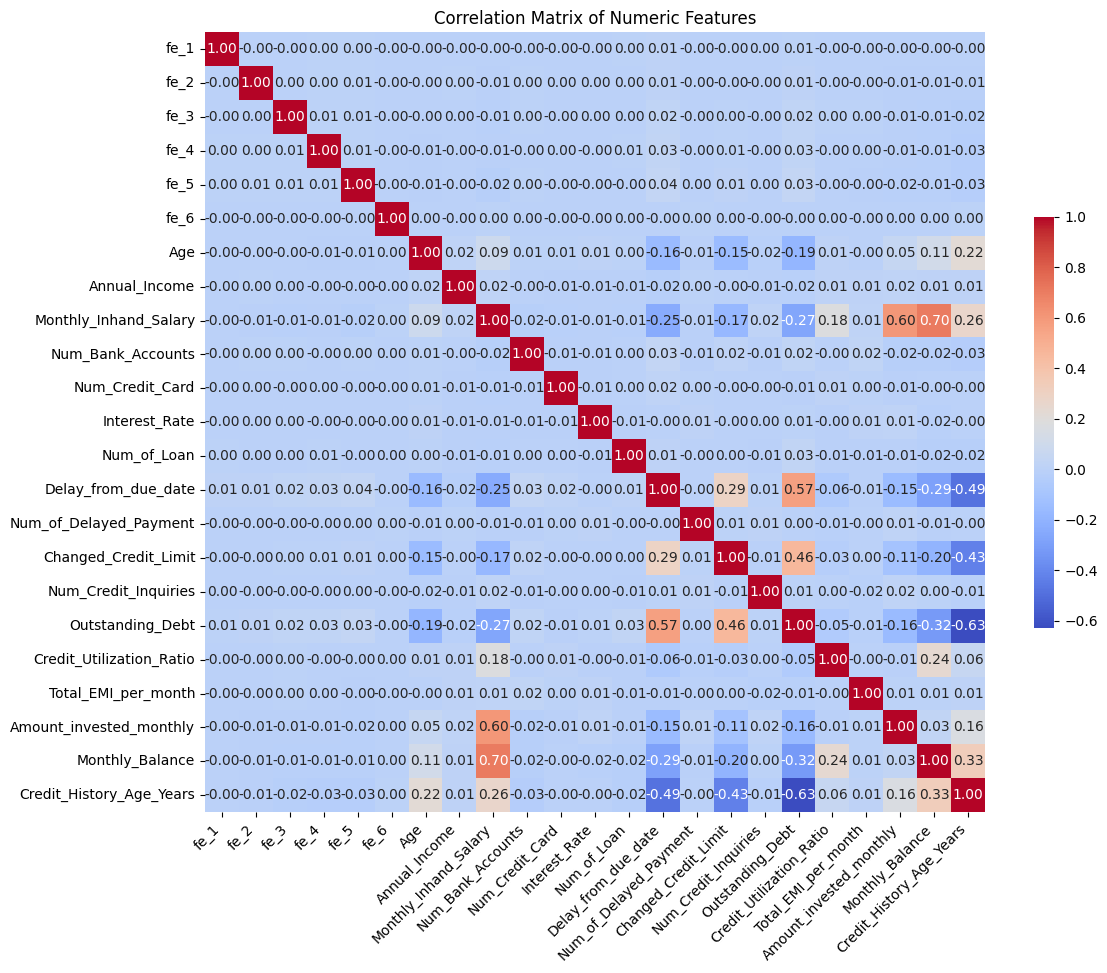

In [306]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert to Pandas
df_numeric_pd = df_numeric.toPandas()

# Step 2: Compute correlation matrix
corr_matrix = df_numeric_pd.corr()

# Step 3: Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .5})
plt.title("Correlation Matrix of Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


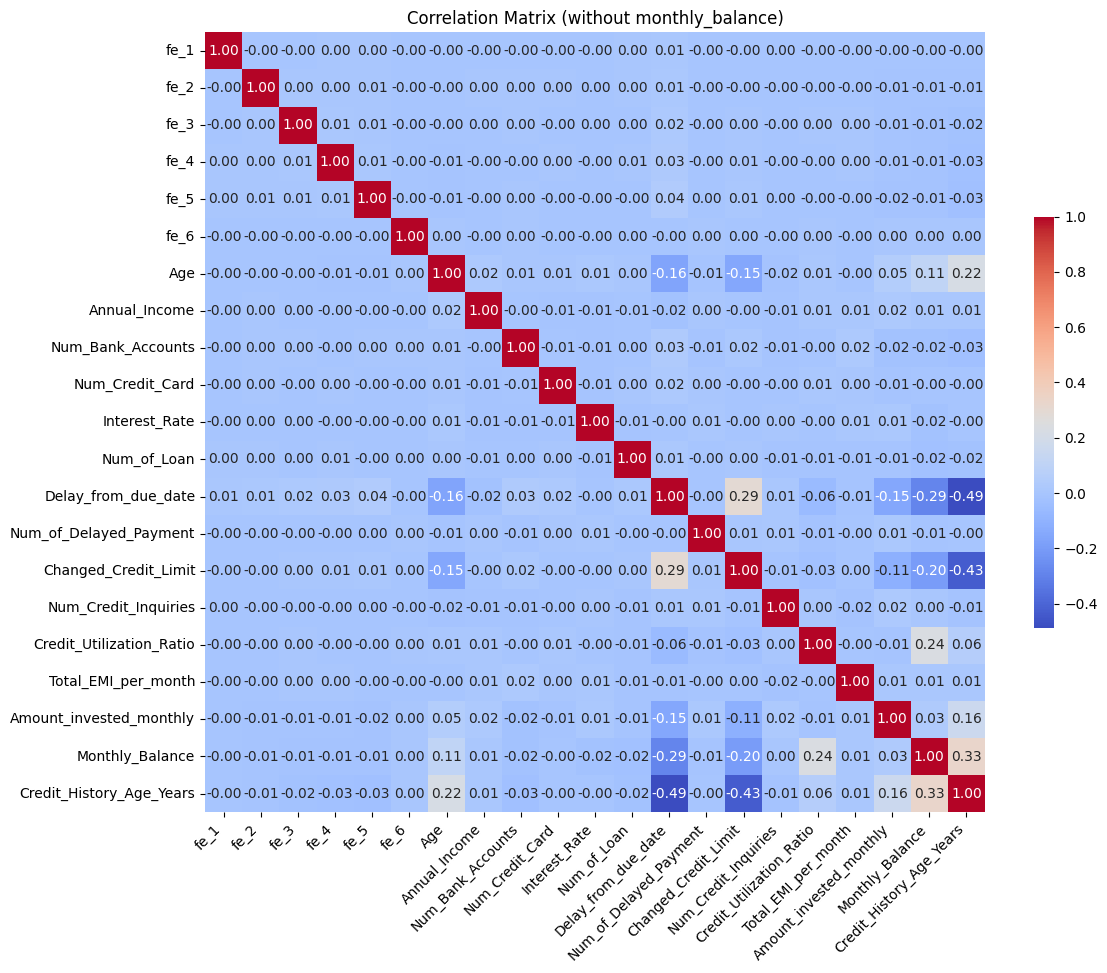

In [308]:
# Drop the column first
df_numeric = df_numeric.drop('Monthly_Inhand_Salary')

# Then convert to Pandas and plot
df_numeric_pd = df_numeric.toPandas()



corr_matrix = df_numeric_pd.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={'shrink': .5})
plt.title("Correlation Matrix (without monthly_balance)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [309]:
from pyspark.sql.types import StringType

# Get all string (categorical) columns
categorical_columns = [field.name for field in gold_table_df.schema.fields if isinstance(field.dataType, StringType) and field.name != "Customer_ID"]
df_cat = gold_table_df.select(categorical_columns).toPandas()

print("Categorical columns:", categorical_columns)

print(df_cat.head(5))


Categorical columns: ['occupation', 'credit_mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
   occupation credit_mix Payment_of_Min_Amount  \
0  Accountant       Good                    No   
1  Accountant   Standard                   Yes   
2   Developer       Good                    No   
3      Lawyer       Good                    No   
4     Manager        Bad                   Yes   

                  Payment_Behaviour  
0    Low_spent_Small_value_payments  
1   High_spent_Small_value_payments  
2    Low_spent_Small_value_payments  
3                           Unknown  
4  High_spent_Medium_value_payments  


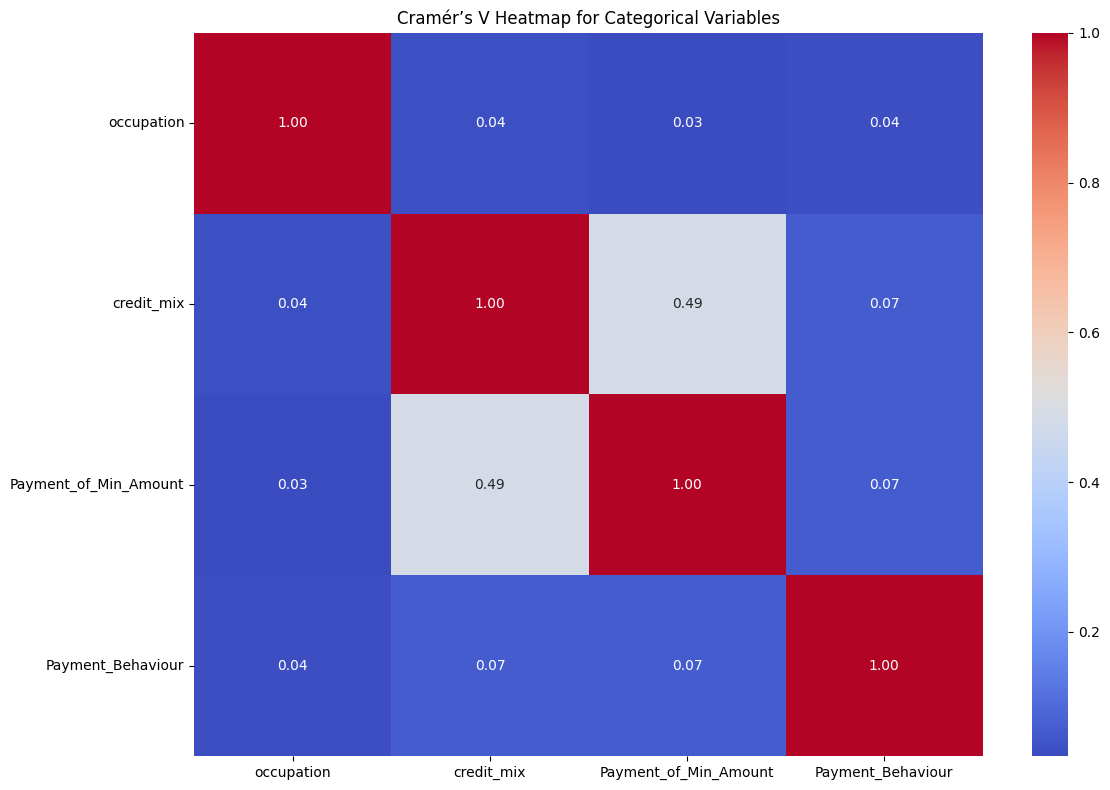

In [310]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1))) if min(r, k) > 1 else np.nan

# Calculate pairwise Cramér’s V
cramers_results = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df_cat[col1], df_cat[col2])

# Convert to float
cramers_results = cramers_results.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cramers_results, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Cramér’s V Heatmap for Categorical Variables")
plt.tight_layout()
plt.show()

### Drop columns

it appears that we only need to drop 1 column to 

### One hot encoding

In [661]:
gold_table_df = gold_table_df.withColumn(
    "Payment_Behaviour",
    F.when(F.col("Payment_Behaviour").rlike(r"^[a-zA-Z_]+$"), F.col("Payment_Behaviour")).otherwise("Unknown")
)

gold_table_df = gold_table_df.withColumn(
    "Credit_Mix",
    F.when(F.col("Credit_Mix") == "_", "Unknown").otherwise(F.col("Credit_mix"))
)

In [662]:

from pyspark.sql.functions import explode, split, col, trim, regexp_replace

# Remove trailing commas and clean up the column
gold_table_df = gold_table_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r",\s*$", "")
)

# Replace " and " with a consistent delimiter (e.g., ", ")
gold_table_df = gold_table_df.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), r"\s+and\s+", ", ")
)

# Split the Type_of_Loan column into an array of loan types
gold_table_df = gold_table_df.withColumn(
    "Type_of_Loan_Array", split(col("Type_of_Loan"), ", ")
)

# Explode the array to create a new row for each loan type
gold_table_df = gold_table_df.withColumn(
    "Type_of_Loan", explode(col("Type_of_Loan_Array"))
).drop("Type_of_Loan_Array")

# Trim any extra gold_table_df from the loan types
gold_table_df = test.withColumn(
    "Type_of_Loan", regexp_replace(col("Type_of_Loan"), ",", "")
)

# Count the occurrences of each unique loan type
loan_type_counts = gold_table_df.groupBy("Type_of_Loan").count().orderBy("count", ascending=False)

# Show the results
loan_type_counts.show(truncate=False)

gold_table_pd = gold_table_df.toPandas()

gold_table_pd.head()


+-----------------------+-----+
|Type_of_Loan           |count|
+-----------------------+-----+
|Payday Loan            |5071 |
|Credit-Builder Loan    |5055 |
|Not Specified          |4952 |
|Home Equity Loan       |4888 |
|Student Loan           |4871 |
|Mortgage Loan          |4867 |
|Personal Loan          |4861 |
|Debt Consolidation Loan|4847 |
|Auto Loan              |4749 |
+-----------------------+-----+



,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x10ac,16718,1270.220417,7,3,15,4,Credit-Builder Loan,26,11,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319,2024-08-01
1,CUS_0x10ac,16718,1270.220417,7,3,15,4,Credit-Builder Loan,26,11,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319,2024-08-01
2,CUS_0x10ac,16718,1270.220417,7,3,15,4,Home Equity Loan,26,11,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319,2024-08-01
3,CUS_0x10ac,16718,1270.220417,7,3,15,4,Debt Consolidation Loan,26,11,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319,2024-08-01
4,CUS_0x10c5,158623,13180.596667,2,7,10,1,Payday Loan,10,5,...,Good,1134.0,41.796800,30 Years and 2 Months,No,91.033905,282.718689,High_spent_Medium_value_payments,1194,2024-08-01


In [425]:
from pyspark.sql.functions import col, split, explode, trim, collect_set, array_contains, when
from pyspark.sql import functions as F

# Step 1: Extract unique loan types
loan_split_df = gol.withColumn("Loan_List", split(col("Type_of_Loan"), ","))

# Step 2: Get unique loan types (flattened)
loan_types = (
    loan_split_df
    .select(explode(col("Loan_List")).alias("Loan"))
    .withColumn("Loan", trim(col("Loan")))
    .filter(col("Loan").isNotNull())
    .distinct()
    .rdd.flatMap(lambda x: x)
    .collect()
)

# Step 3: Add binary columns for each loan type
for loan in loan_types:
    bronze_feat_financial_df = bronze_feat_financial_df.withColumn(
        f"Loan_{loan.replace(' ', '_')}",
        when(col("Type_of_Loan").contains(loan), 1).otherwise(0)
    )


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
0,CUS_0x10ac,16718.0,1270.220417,7,3,15,4.0,Credit-Builder Loan,26,11.0,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319.0,2024-08-01
1,CUS_0x10ac,16718.0,1270.220417,7,3,15,4.0,Credit-Builder Loan,26,11.0,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319.0,2024-08-01
2,CUS_0x10ac,16718.0,1270.220417,7,3,15,4.0,Home Equity Loan,26,11.0,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319.0,2024-08-01
3,CUS_0x10ac,16718.0,1270.220417,7,3,15,4.0,Debt Consolidation Loan,26,11.0,...,_,853.0,31.397339,16 Years and 3 Months,No,50.961936,36.413094,!@9#%8,319.0,2024-08-01
4,CUS_0x10c5,158623.0,13180.596667,2,7,10,1.0,Payday Loan,10,5.0,...,Good,1134.0,41.796800,30 Years and 2 Months,No,91.033905,282.718689,High_spent_Medium_value_payments,1194.0,2024-08-01


In [ ]:
gold_table_pd = [col for col in gold_table_pd if col not in ["Type_of_Loan", "Changed_Credit_Limit"]]

df_cat_2 = gold_table_df.select(categorical_columns_filtered).toPandas()

##### Checks checks

In [131]:
from pyspark.sql.functions import when, regexp_extract

# Encode 'Payment_of_Min_Amount'
gold_table_pd = gold_table_pd.withColumn(
    "Payment_of_Min_Amount_Binary", when(col("Payment_of_Min_Amount") == "Yes", 1).otherwise(0)
)

In [ ]:
# Step 3: One-hot encode the Type_of_Loan column
# Define the unique loan types for one-hot encoding
loan_types = ["Payday Loan", "Credit-Builder Loan", "Not Specified", "Home Equity Loan", 
              "Student Loan", "Mortgage Loan", "Personal Loan", "Debt Consolidation Loan", "Auto Loan"]

# Create one-hot encoded columns for each loan type
for loan_type in loan_types:
    gold_table_pd = gold_table_pd.withColumn(
        f"Loan_{loan_type.replace(' ', '_')}", 
        when(col("Type_of_Loan") == loan_type, 1).otherwise(0)
    )

# Drop the Types_Of_Loans after one hot encoding it
gold_table_pd = gold_table_pd.drop("Type_of_Loan")

In [ ]:
payment_behaviour_categories = [
    "Low_spent_Small_value_payments",
    "High_spent_Medium_value_payments",
    "Low_spent_Medium_value_payments",
    "High_spent_Large_value_payments",
    "High_spent_Small_value_payments",
    "Low_spent_Large_value_payments",
    "Unknown"
]

# One-hot encode each category
for category in payment_behaviour_categories:
    gold_table_pd = gold_table_pd.withColumn(
        f"Payment_Behaviour_{category.replace(' ', '_')}",
        when(col("Payment_Behaviour") == category, 1).otherwise(0)
    )

# Drop the original Payment_Behaviour column if no longer needed
gold_table_pd = gold_table_pd.drop("Payment_Behaviour")

# Show the resulting DataFrame
gold_table_pd.show(5)